In [4]:
#pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from bs4 import BeautifulSoup
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np

2023-02-25 09:20:09.845117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 09:20:12.603153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-25 09:20:12.603191: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 09:20:21.045228: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
documents = []
for file in os.listdir("reuters_sample/"):
    
        filename = os.path.join("reuters_sample", file)
        f = open(filename, 'r', encoding='utf-8', errors='ignore')
        dataFile = f.read()
        
        soup = BeautifulSoup(dataFile, 'html.parser')
        contents = soup.findAll('body')
        
        for content in contents:
            documents.append(content.text)

In [4]:
print('Number of documents: {}'.format(len(documents)))

Number of documents: 6429


In [5]:
print(documents[0])

Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will be late this year.
    Arrivals for the week ended February 22 were 155,221 bags
of 60 kilos making a cumulative total for the season of 5.93
mln against 5.81 at the same stage last year. Again it seems
that cocoa delivered earlier on consignment was included in the
arrivals figures.
    Comissaria Smith said there is still some doubt as to how
much old crop cocoa is still available as harvesting has
practically come to an end. With total Bahia crop estimates
around 6.4 mln bags and sales standing at almost 6.2 mln there
are a few hundred thousand bags still in the hands of farmers,
middlemen, exporters and processors.
    There are doubts as to how much of this cocoa would be fit
for export 

### Remove 'Reauter and ' from each document

In [65]:
new_doc = []
for d in documents:
    new_doc.append(d[:-8])
print(new_doc[0])

Inco Ltd said it did not expect its
earlier reported removal from the Dow Jones industrial index to
make a major impact on the company's stock.
    "We don't think that individuals or institutions buy our
shares because we were one of the Dow Jones industrials,"
spokesman Ken Cherney said in reply to a query.
    Inco closed 1-3/8 lower at 19-3/8 in second most active
trading on the Toronto Stock Exchange.
    The Wall Street Journal, which selects the index, said Inco
was dropped to make the index more representative of the
market. Inco, the non-Communist world's largest nickel
producer, was a member of the index since 1928.
    Replacing Inco and Owens-Illinois Inc will be Coca-Cola Co
and Boeing Co, effective tomorrow.
    Nickel analyst Ilmar Martens at Walwyn Stodgell Cochran
Murray Ltd said Inco's removal from the index would likely
spark short-term selling pressure on the stock.
    "Some investors who have Inco may suddenly say, 'well,
because it's not now a Dow stock, we shoul

### Join the documents

In [72]:
data = ""
for d in new_doc:
    data += d

In [73]:
len(data)

15775658

In [74]:
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
len(data)

15466792

In [75]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

In [76]:
data[:200]

'Inco Ltd said it did not expect itsearlier reported removal from the Dow Jones industrial index tomake a major impact on the company\'s stock.    "We don\'t think that individuals or institutions buy ou'

### Tokenization

In [80]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[6910, 109, 4, 10, 259, 40, 674, 31970, 265, 4166]

In [81]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

133586


In [84]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  2480274


array([[ 6910,   109],
       [  109,     4],
       [    4,    10],
       [   10,   259],
       [  259,    40],
       [   40,   674],
       [  674, 31970],
       [31970,   265],
       [  265,  4166],
       [ 4166,    21]])

In [85]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [88]:
y = to_categorical(y, num_classes=vocab_size)

### Model

In [89]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

2023-02-04 14:25:13.482542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             1335860   
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 133586)            133719586 
                                                                 
Total params: 148,104,446
Trainable params: 148,104,446
Non-trainable params: 0
_________________________________________________________________


### Plot the model

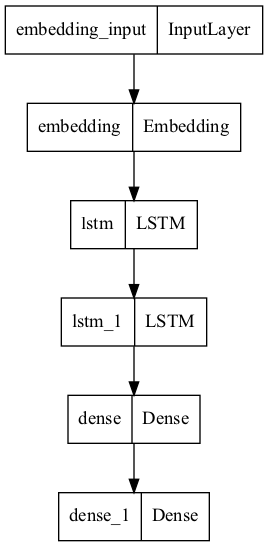

In [91]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [93]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

### Fit the model

In [94]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
  276/38755 [..............................] - ETA: 11:18:43 - loss: 8.6318

KeyboardInterrupt: 